# EDA

## More data preparation

### Load libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

### Load DataFrame and first glance

In [2]:
# Load DataFram and glance:

df = pd.read_csv('df.csv')
df.head()

,Unnamed: 0,CRASH_DATE,DEVICE_CONDITION,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,ROADWAY_SURFACE_COND,ROAD_DEFECT,DAMAGE,ZIPCODE,SEX,AGE,MAKE,MODEL,VEHICLE_YEAR
0,1,12/31/2021 12:45:00 PM,NO CONTROLS,10,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",60619,M,44,CHEVROLET,MALIBU,2016
1,2,12/31/2021 12:45:00 PM,NO CONTROLS,10,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",60619,M,44,JEEP,PATRIOT,2017
2,3,12/31/2021 12:45:00 PM,NO CONTROLS,10,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",60620,F,57,CHEVROLET,MALIBU,2016
3,4,12/31/2021 12:45:00 PM,NO CONTROLS,10,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"$501 - $1,500",60620,F,57,JEEP,PATRIOT,2017
4,5,12/31/2021 12:40:00 PM,FUNCTIONING PROPERLY,30,CLEAR,DAYLIGHT,DRY,NO DEFECTS,"OVER $1,500",60641,M,47,HONDA,FIT,2009


In [3]:
# Drop un-needed column:
df = df.drop('Unnamed: 0', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339815 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CRASH_DATE            339815 non-null  object
 1   DEVICE_CONDITION      339815 non-null  object
 2   POSTED_SPEED_LIMIT    339815 non-null  int64 
 3   WEATHER_CONDITION     339815 non-null  object
 4   LIGHTING_CONDITION    339815 non-null  object
 5   ROADWAY_SURFACE_COND  339815 non-null  object
 6   ROAD_DEFECT           339815 non-null  object
 7   DAMAGE                339815 non-null  object
 8   ZIPCODE               339815 non-null  object
 9   SEX                   339815 non-null  object
 10  AGE                   339815 non-null  int64 
 11  MAKE                  339815 non-null  object
 12  MODEL                 339815 non-null  object
 13  VEHICLE_YEAR          339815 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 36.3+ MB


### Inspect each column

#### 1. CRASH_DATE
Select date range from 06/01/2021 to 12/31/2021 to reduce the data size.

In [4]:
# Check the date range:
df['CRASH_DATE'].min(), df['CRASH_DATE'].max()

('08/06/2018 09:15:00 AM', '12/31/2021 12:45:00 PM')

In [5]:
df['CRASH_DATE'].sort_values(ascending=False)

0         12/31/2021 12:45:00 PM
1         12/31/2021 12:45:00 PM
2         12/31/2021 12:45:00 PM
3         12/31/2021 12:45:00 PM
7         12/31/2021 12:40:00 PM
                   ...          
339812    08/06/2018 09:50:00 PM
339809    08/06/2018 09:50:00 PM
339811    08/06/2018 09:50:00 PM
339813    08/06/2018 09:35:00 AM
339814    08/06/2018 09:15:00 AM
Name: CRASH_DATE, Length: 339815, dtype: object

In [6]:
# df = df.sort_values(by='CRASH_DATE', ascending=False)[:50000]
# df.info()

In [7]:
# Select date range starting from 06/01/2021 for smaller data size:
# df = df[df['CRASH_DATE'] >= '06/01/2021']
# df.info()

#### 2. DAMAGE
Convert the dtype to 'category' for smaller data size

In [8]:
df['DAMAGE'].value_counts(normalize=True)

OVER $1,500      0.638271
$501 - $1,500    0.277854
$500 OR LESS     0.083875
Name: DAMAGE, dtype: float64

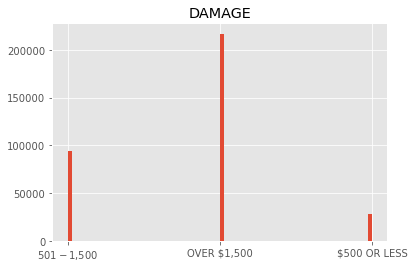

In [9]:
df['DAMAGE'].hist(bins='auto')
plt.title('DAMAGE')
plt.show();

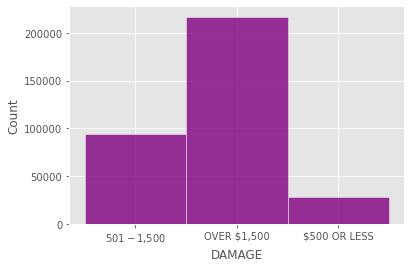

In [10]:
sns.histplot(df['DAMAGE'], color='purple',alpha=0.8);

In [11]:
df['DAMAGE']= df['DAMAGE'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339815 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            339815 non-null  object  
 1   DEVICE_CONDITION      339815 non-null  object  
 2   POSTED_SPEED_LIMIT    339815 non-null  int64   
 3   WEATHER_CONDITION     339815 non-null  object  
 4   LIGHTING_CONDITION    339815 non-null  object  
 5   ROADWAY_SURFACE_COND  339815 non-null  object  
 6   ROAD_DEFECT           339815 non-null  object  
 7   DAMAGE                339815 non-null  category
 8   ZIPCODE               339815 non-null  object  
 9   SEX                   339815 non-null  object  
 10  AGE                   339815 non-null  int64   
 11  MAKE                  339815 non-null  object  
 12  MODEL                 339815 non-null  object  
 13  VEHICLE_YEAR          339815 non-null  int64   
dtypes: category(1), int64(3), object(10)

#### 3. ZIPCODE

Trim the long tails and outliers: drop 'ZIPCODE' if its value_counts is less than 600.

In [13]:
zipcode_count = df['ZIPCODE'].value_counts()
zipcode_count

60629         13833
60639         10797
60632          9226
60617          8693
60620          8303
              ...  
91746             1
68114             1
46325             1
07652-3826        1
78945             1
Name: ZIPCODE, Length: 5163, dtype: int64

In [14]:
zipcod_dict = zipcode_count.to_dict()

zipcode_drop_list= []

for k in zipcod_dict:
    if zipcod_dict[k] < 600:
        zipcode_drop_list.append(k)

df = df[df.ZIPCODE.isin(zipcode_drop_list) == False]

In [15]:
len(df['ZIPCODE'].value_counts())

82

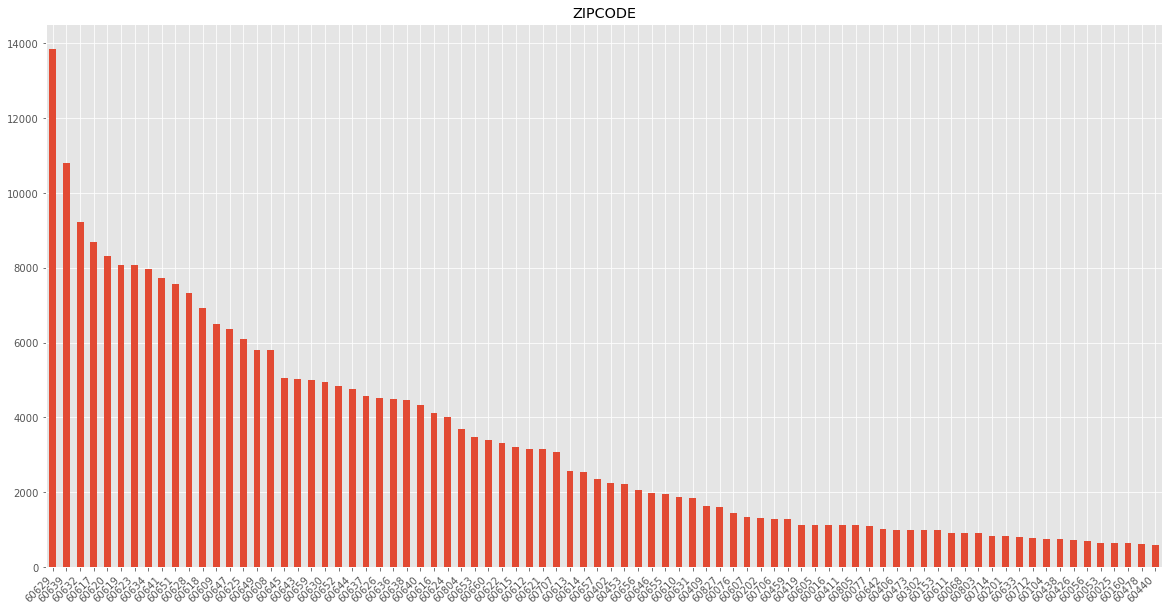

In [16]:
fig, ax = plt.subplots(figsize=[20,10])
df['ZIPCODE'].value_counts().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.title("ZIPCODE")
plt.show()

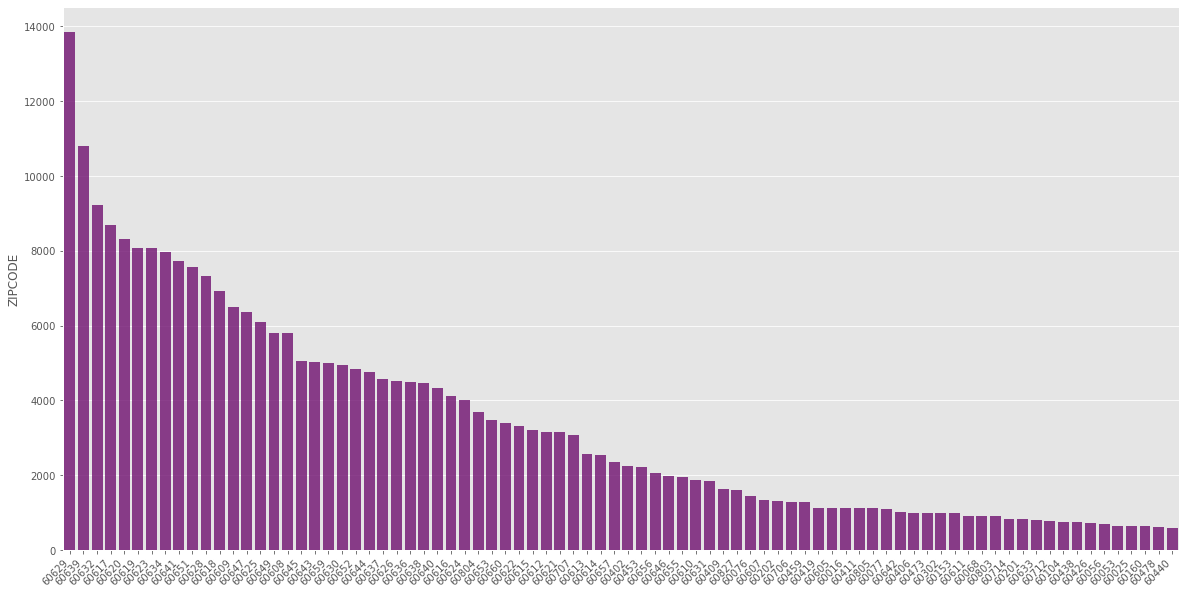

In [17]:
fig, ax = plt.subplots(figsize=[20,10])
sns.barplot(x=df['ZIPCODE'].value_counts().index, y=df['ZIPCODE'].value_counts(), color='purple',alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.show();

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277160 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            277160 non-null  object  
 1   DEVICE_CONDITION      277160 non-null  object  
 2   POSTED_SPEED_LIMIT    277160 non-null  int64   
 3   WEATHER_CONDITION     277160 non-null  object  
 4   LIGHTING_CONDITION    277160 non-null  object  
 5   ROADWAY_SURFACE_COND  277160 non-null  object  
 6   ROAD_DEFECT           277160 non-null  object  
 7   DAMAGE                277160 non-null  category
 8   ZIPCODE               277160 non-null  object  
 9   SEX                   277160 non-null  object  
 10  AGE                   277160 non-null  int64   
 11  MAKE                  277160 non-null  object  
 12  MODEL                 277160 non-null  object  
 13  VEHICLE_YEAR          277160 non-null  int64   
dtypes: category(1), int64(3), object(10)

#### 4. SEX
Drop 'SEX' = 'X' and convert the dtype to 'category' for smaller data size

In [19]:
df['SEX'].value_counts(normalize=True)

M    0.564804
F    0.434435
X    0.000761
Name: SEX, dtype: float64

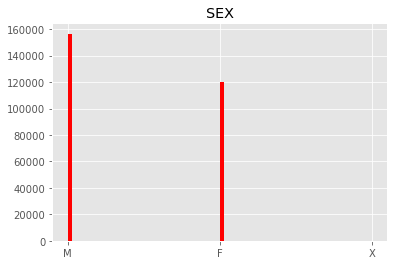

In [20]:
df['SEX'].hist(bins='auto', color='red')
plt.title("SEX")
plt.show()

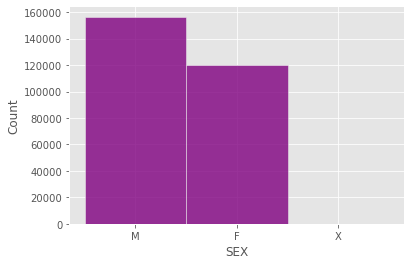

In [21]:
sns.histplot(df['SEX'], color='purple',alpha=0.8);

In [22]:
df.drop(df[df['SEX'] == 'X'].index, inplace = True)

In [23]:
df['SEX'].value_counts()

M    156541
F    120408
Name: SEX, dtype: int64

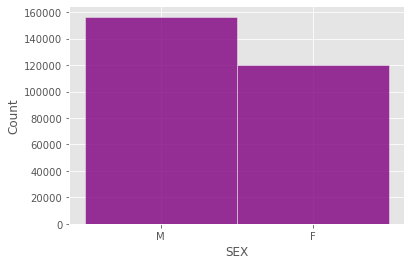

In [24]:
sns.histplot(df['SEX'], color='purple',alpha=0.8);

In [25]:
df.memory_usage(deep=True)

Index                    2215592
CRASH_DATE              21878971
DEVICE_CONDITION        19990544
POSTED_SPEED_LIMIT       2215592
WEATHER_CONDITION       17236874
LIGHTING_CONDITION      18808835
ROADWAY_SURFACE_COND    16674972
ROAD_DEFECT             18562517
DAMAGE                    277264
ZIPCODE                 17170838
SEX                     17170838
AGE                      2215592
MAKE                    18154025
MODEL                   18122054
VEHICLE_YEAR             2215592
dtype: int64

In [26]:
df['SEX']= df['SEX'].astype('category')

In [27]:
df.memory_usage(deep=True)

Index                    2215592
CRASH_DATE              21878971
DEVICE_CONDITION        19990544
POSTED_SPEED_LIMIT       2215592
WEATHER_CONDITION       17236874
LIGHTING_CONDITION      18808835
ROADWAY_SURFACE_COND    16674972
ROAD_DEFECT             18562517
DAMAGE                    277264
ZIPCODE                 17170838
SEX                       277153
AGE                      2215592
MAKE                    18154025
MODEL                   18122054
VEHICLE_YEAR             2215592
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276949 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            276949 non-null  object  
 1   DEVICE_CONDITION      276949 non-null  object  
 2   POSTED_SPEED_LIMIT    276949 non-null  int64   
 3   WEATHER_CONDITION     276949 non-null  object  
 4   LIGHTING_CONDITION    276949 non-null  object  
 5   ROADWAY_SURFACE_COND  276949 non-null  object  
 6   ROAD_DEFECT           276949 non-null  object  
 7   DAMAGE                276949 non-null  category
 8   ZIPCODE               276949 non-null  object  
 9   SEX                   276949 non-null  category
 10  AGE                   276949 non-null  int64   
 11  MAKE                  276949 non-null  object  
 12  MODEL                 276949 non-null  object  
 13  VEHICLE_YEAR          276949 non-null  int64   
dtypes: category(2), int64(3), object(9)


#### 5. AGE
Select 'AGE' between 16 and 80

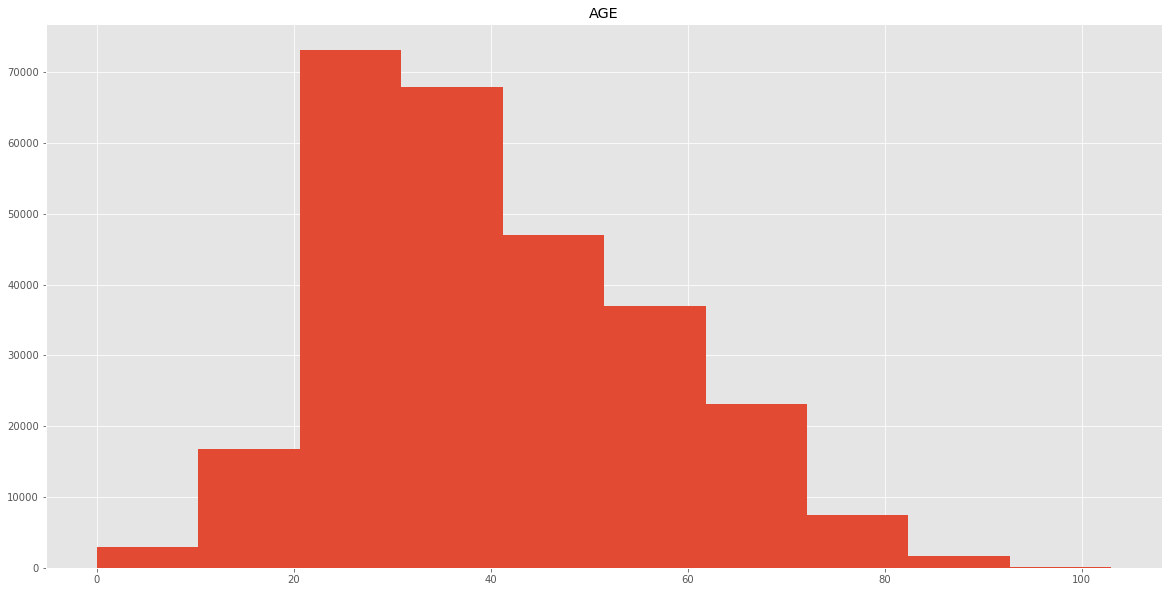

In [29]:
fig, ax = plt.subplots(figsize=[20,10])
df['AGE'].hist()
plt.title("AGE")
plt.show()

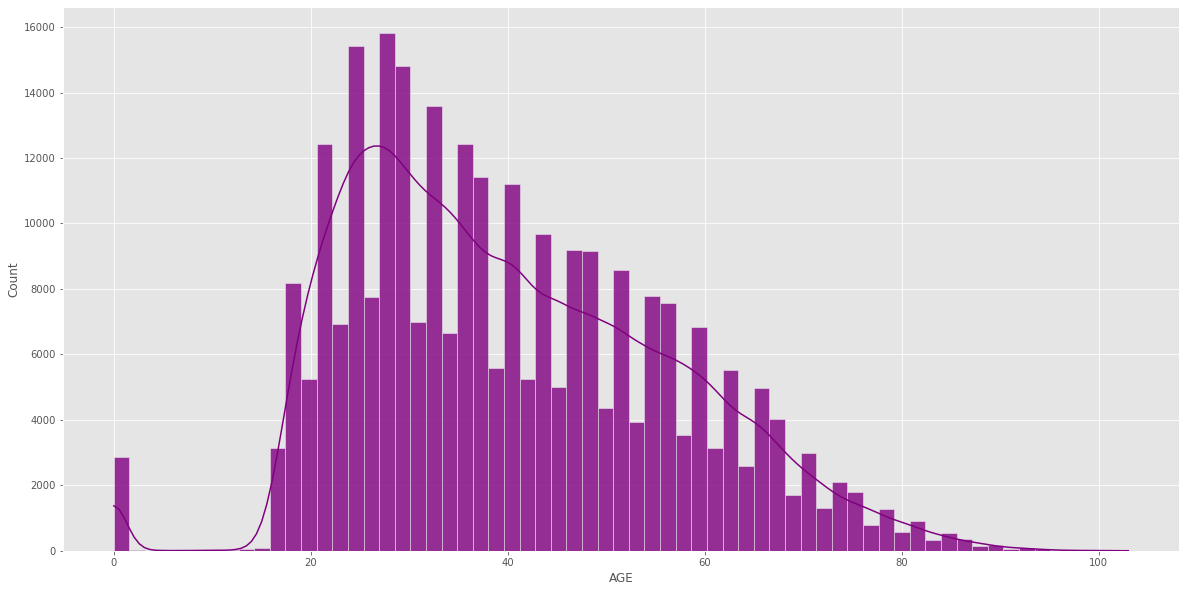

In [30]:
fig, ax = plt.subplots(figsize=[20,10])
sns.histplot(df['AGE'], color='purple',alpha=0.8, bins=65, kde=True)
plt.show();

In [31]:
df = df[(df.AGE >= 16) & (df.AGE <= 80)]

In [32]:
df['AGE'].value_counts()

27    7979
28    7836
25    7789
26    7754
24    7644
      ... 
76     887
77     783
78     691
80     573
79     571
Name: AGE, Length: 65, dtype: int64

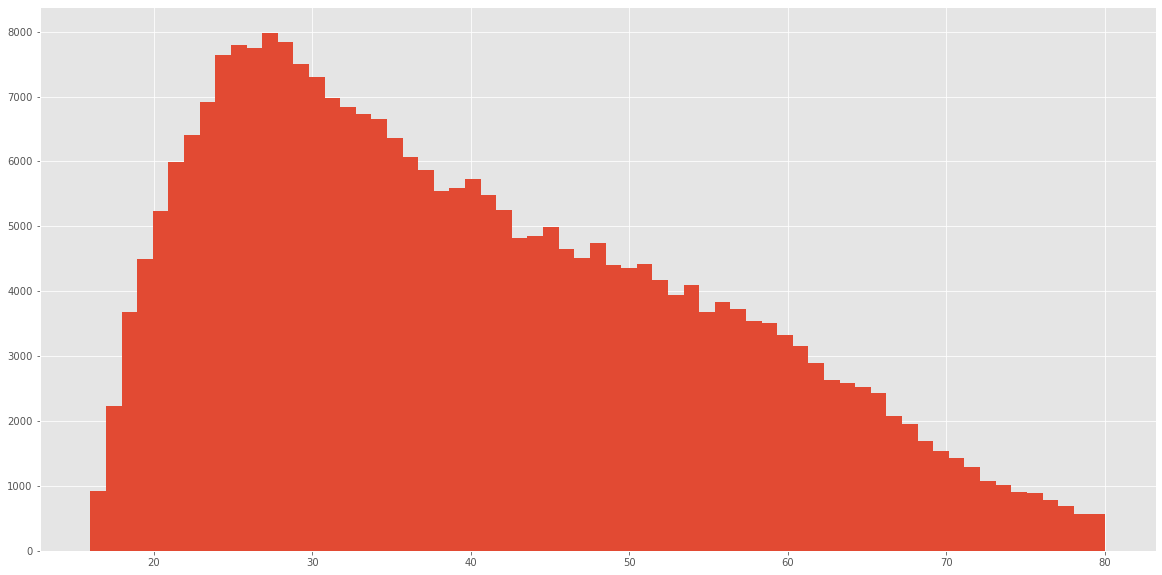

In [33]:
fig, ax = plt.subplots(figsize=[20,10])
df['AGE'].hist(bins=65)
plt.show();

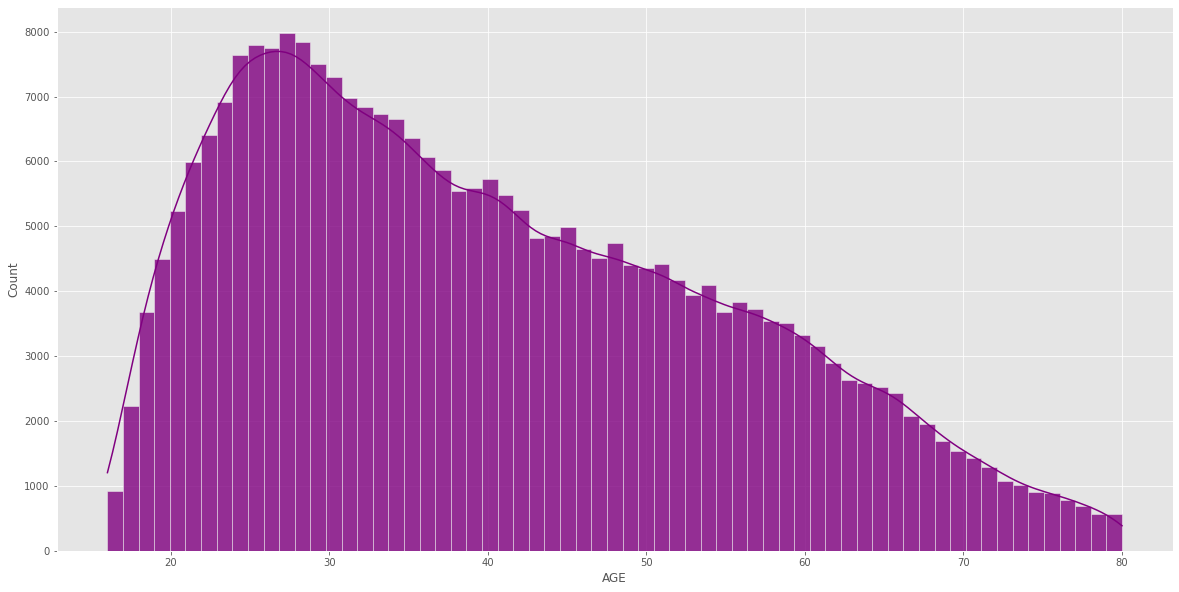

In [34]:
fig, ax = plt.subplots(figsize=[20,10])
sns.histplot(df['AGE'], color='purple',alpha=0.8, bins=65, kde=True)
plt.show();

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271139 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            271139 non-null  object  
 1   DEVICE_CONDITION      271139 non-null  object  
 2   POSTED_SPEED_LIMIT    271139 non-null  int64   
 3   WEATHER_CONDITION     271139 non-null  object  
 4   LIGHTING_CONDITION    271139 non-null  object  
 5   ROADWAY_SURFACE_COND  271139 non-null  object  
 6   ROAD_DEFECT           271139 non-null  object  
 7   DAMAGE                271139 non-null  category
 8   ZIPCODE               271139 non-null  object  
 9   SEX                   271139 non-null  category
 10  AGE                   271139 non-null  int64   
 11  MAKE                  271139 non-null  object  
 12  MODEL                 271139 non-null  object  
 13  VEHICLE_YEAR          271139 non-null  int64   
dtypes: category(2), int64(3), object(9)


#### 6. MAKE
Trim the long tails and outliers: drop 'MAKE' if its value_counts is less than 50.

In [36]:
df['MAKE'].value_counts()

CHEVROLET                                                       35142
NISSAN                                                          27088
HONDA                                                           25971
FORD                                                            23957
TOYOTA MOTOR COMPANY, LTD.                                      22411
                                                                ...  
KTM                                                                 1
RAMBLER - MANUFACTURED PRIOR TO '66 (1966 AND LATER RAMBLERS        1
FLEETCRAFT CORPORATION                                              1
CUMMINS ENGINE COMPANY                                              1
EAGLE                                                               1
Name: MAKE, Length: 207, dtype: int64

<AxesSubplot:>

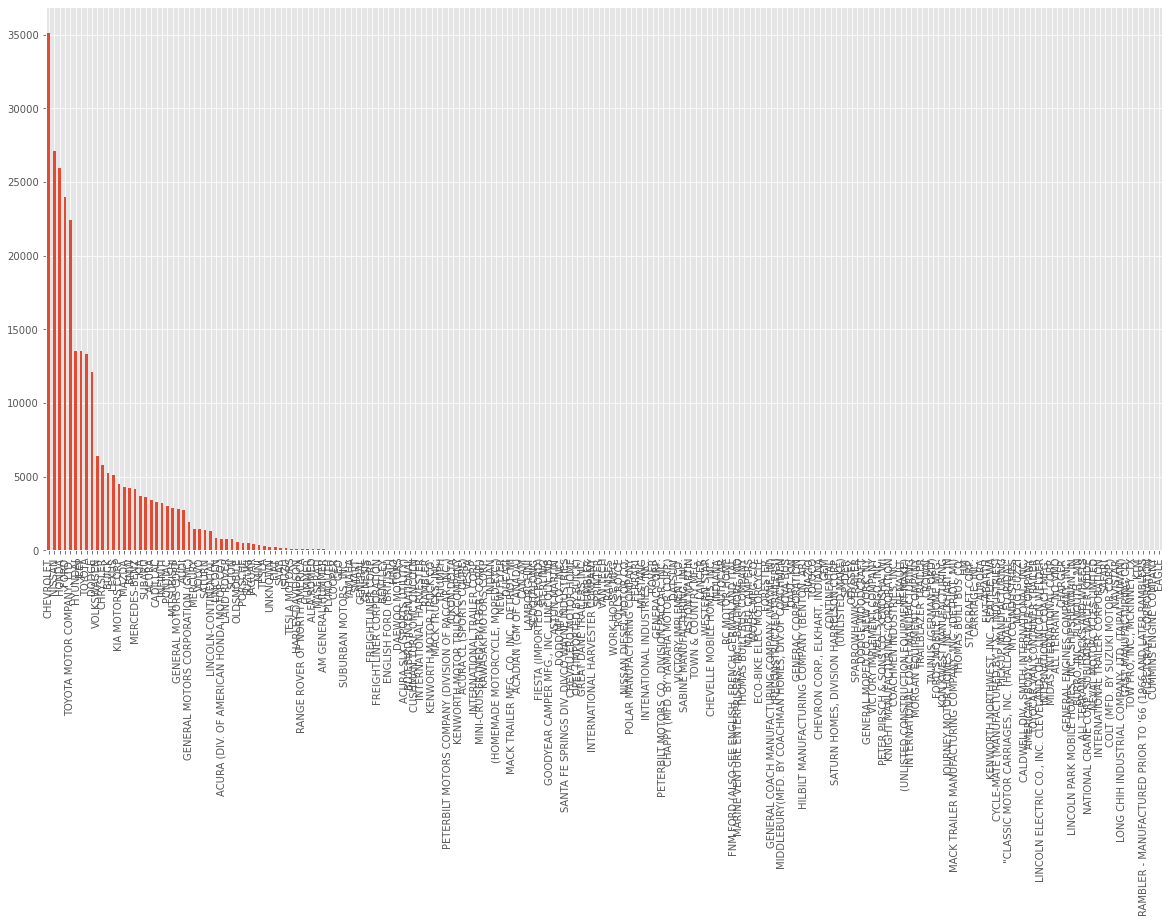

In [37]:
fig, ax = plt.subplots(figsize=[20,10])
df['MAKE'].value_counts().plot(kind='bar')

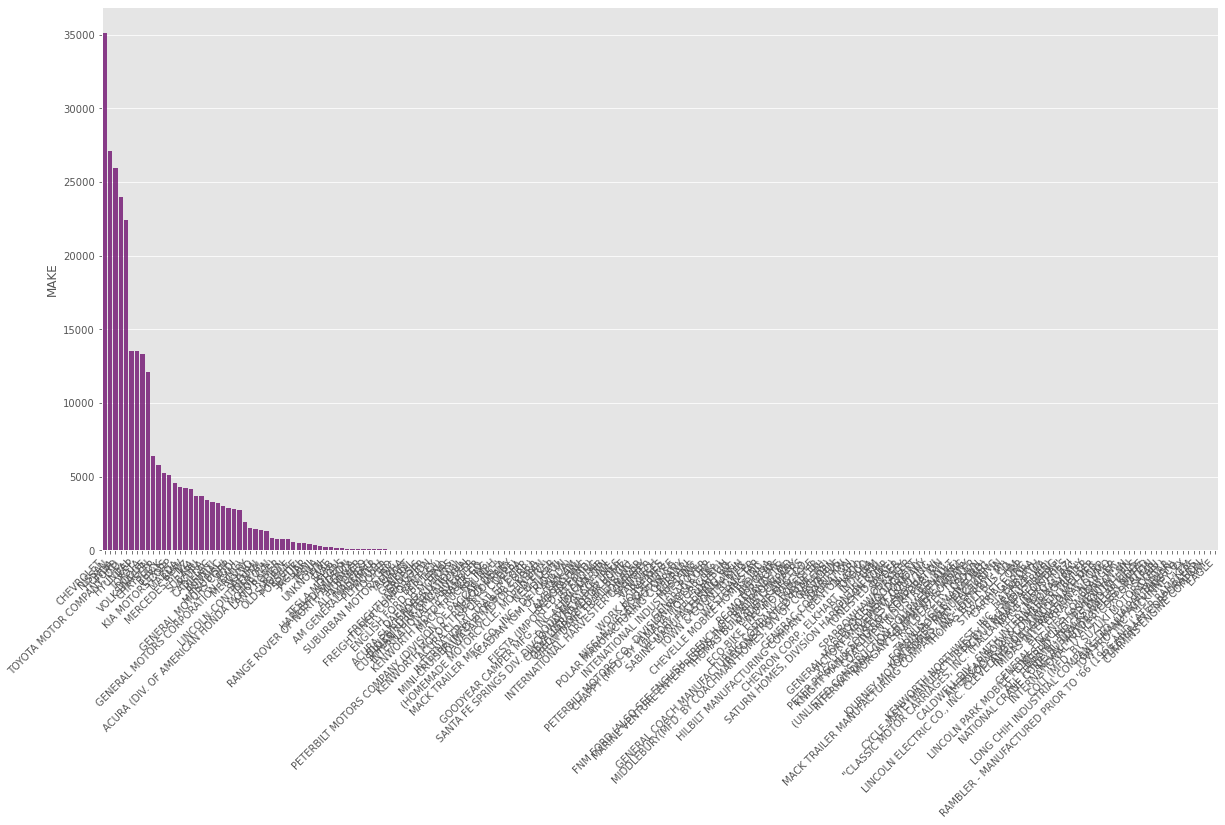

In [38]:
fig, ax = plt.subplots(figsize=[20,10])
sns.barplot(x=df['MAKE'].value_counts().index, y=df['MAKE'].value_counts(), color='purple',alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.show();

In [39]:
make_count = df['MAKE'].value_counts()
make_dict = make_count.to_dict()

make_drop_list= []

for k in make_dict:
    if make_dict[k] < 50:
        make_drop_list.append(k)

df = df[df.MAKE.isin(make_drop_list) == False]

In [40]:
len(df['MAKE'].value_counts())

53

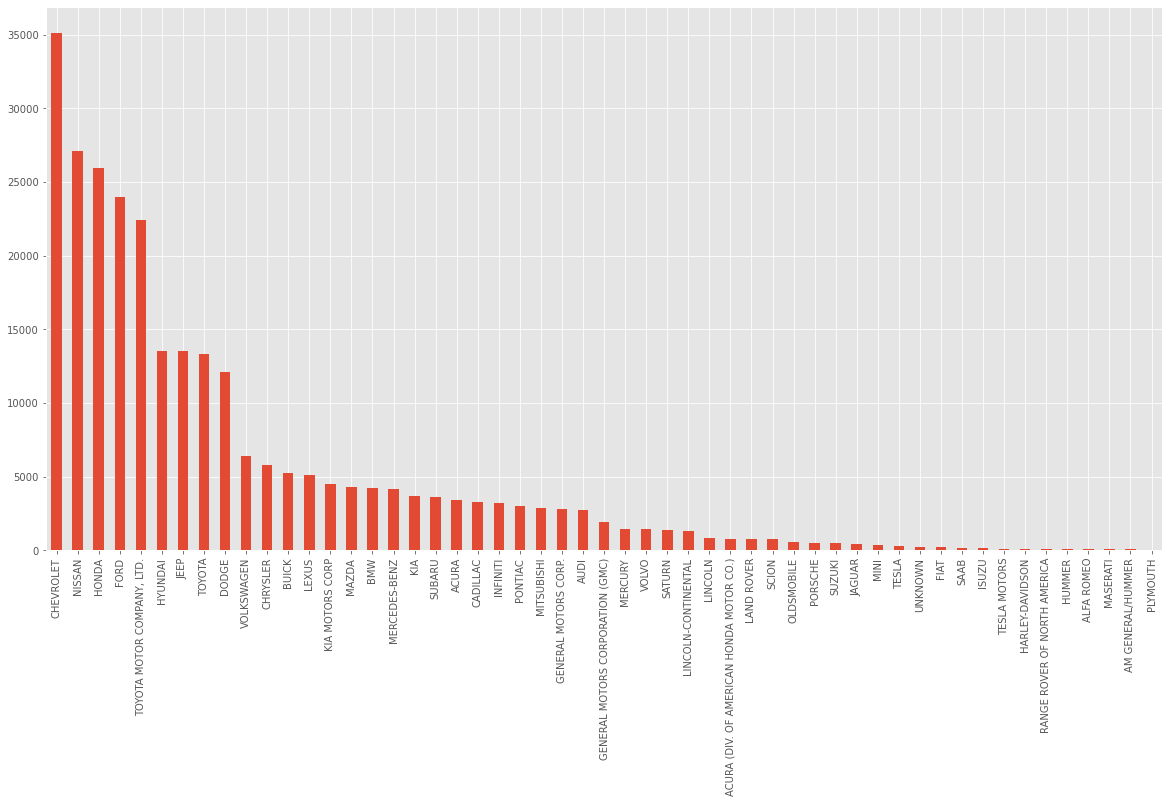

In [41]:
fig, ax = plt.subplots(figsize=[20,10])
df['MAKE'].value_counts().plot(kind='bar');

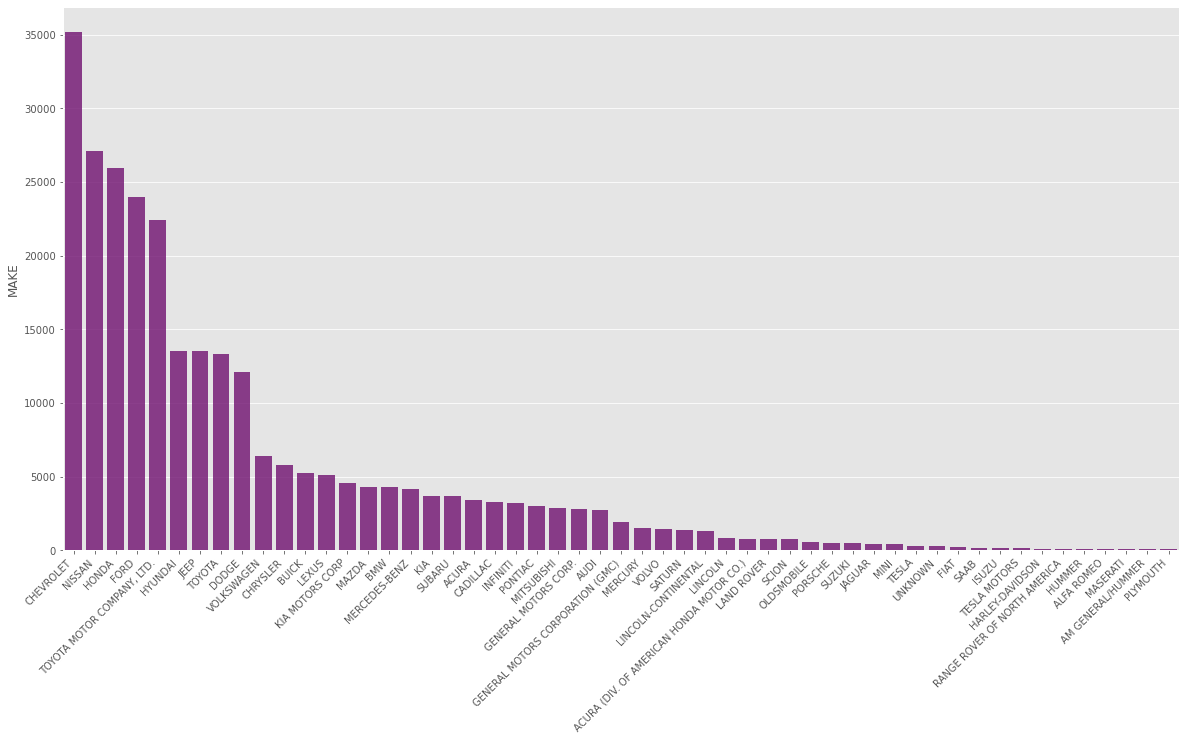

In [42]:
fig, ax = plt.subplots(figsize=[20,10])
sns.barplot(x=df['MAKE'].value_counts().index, y=df['MAKE'].value_counts(), color='purple',alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.show();

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270371 entries, 0 to 339814
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            270371 non-null  object  
 1   DEVICE_CONDITION      270371 non-null  object  
 2   POSTED_SPEED_LIMIT    270371 non-null  int64   
 3   WEATHER_CONDITION     270371 non-null  object  
 4   LIGHTING_CONDITION    270371 non-null  object  
 5   ROADWAY_SURFACE_COND  270371 non-null  object  
 6   ROAD_DEFECT           270371 non-null  object  
 7   DAMAGE                270371 non-null  category
 8   ZIPCODE               270371 non-null  object  
 9   SEX                   270371 non-null  category
 10  AGE                   270371 non-null  int64   
 11  MAKE                  270371 non-null  object  
 12  MODEL                 270371 non-null  object  
 13  VEHICLE_YEAR          270371 non-null  int64   
dtypes: category(2), int64(3), object(9)


#### 7. MODEL
Trim the long tails and outliers: drop 'MODEL' if its value_counts is less than 100.

In [44]:
df['MODEL'].value_counts()

UNKNOWN                         16844
CAMRY                           10065
COROLLA                          7332
CIVIC                            7110
OTHER (EXPLAIN IN NARRATIVE)     6836
                                ...  
TOYOTA/HI-LUX (TRUCK)               1
XT                                  1
F650 Super Crew                     1
V-8                                 1
STANDAR                             1
Name: MODEL, Length: 1235, dtype: int64

In [45]:
# Drop 'UNKNOWN':
df.drop(df[df['MODEL'] == 'UNKNOWN'].index, inplace = True)

# Drop 'OTHER (EXPLAIN IN NARRATIVE)':
df.drop(df[df['MODEL'] == 'OTHER (EXPLAIN IN NARRATIVE)'].index, inplace = True)

In [46]:
df['MODEL'].value_counts()

CAMRY                10065
COROLLA               7332
CIVIC                 7110
ACCORD                6383
IMPALA                4615
                     ...  
200 Series               1
COSMO                    1
BEL AIR                  1
COMPACT SPORTSMAN        1
80                       1
Name: MODEL, Length: 1233, dtype: int64

In [47]:
model_count = df['MODEL'].value_counts()
model_dict = model_count.to_dict()

model_drop_list= []

for k in model_dict:
    if model_dict[k] < 100:
        model_drop_list.append(k)

df = df[df.MODEL.isin(model_drop_list) == False]

In [48]:
df['MODEL'].value_counts()

CAMRY         10065
COROLLA        7332
CIVIC          7110
ACCORD         6383
IMPALA         4615
              ...  
QUEST           100
ECOSPORT        100
DENALI          100
RX450H          100
MITSUBISHI      100
Name: MODEL, Length: 325, dtype: int64

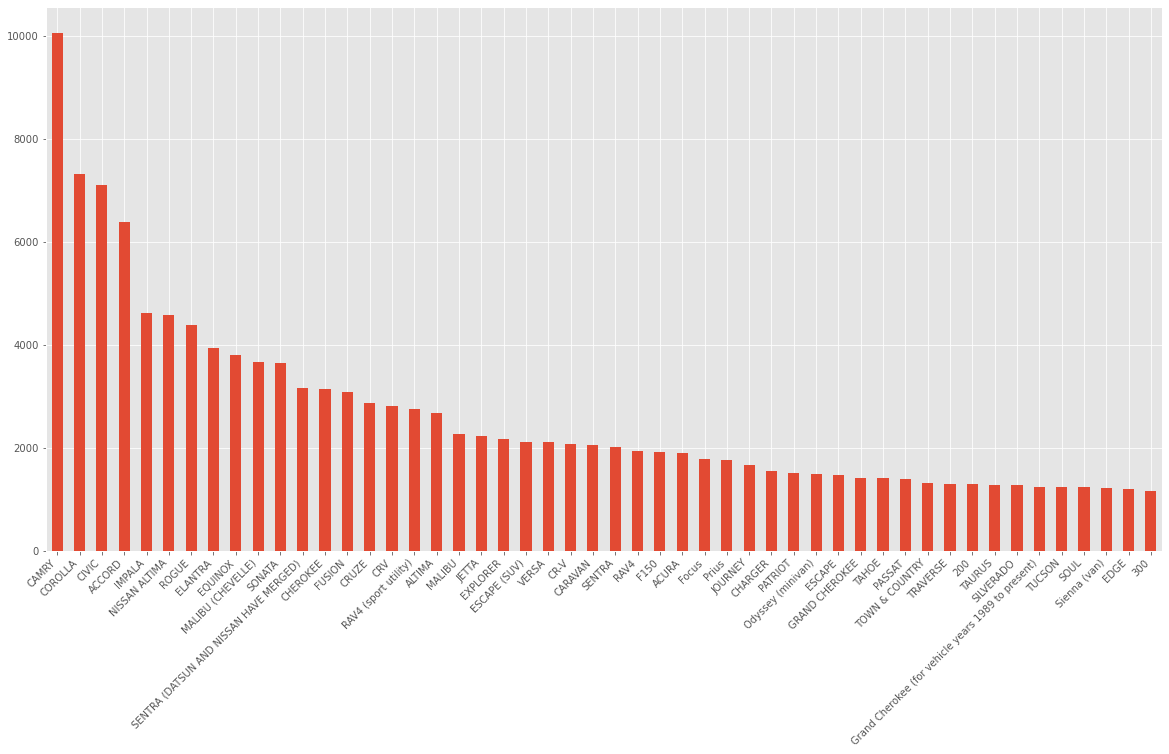

In [49]:
fig, ax = plt.subplots(figsize=[20,10])
df['MODEL'].value_counts()[:50].plot(kind='bar')
plt.xticks(rotation=45, ha='right', fontsize=10);

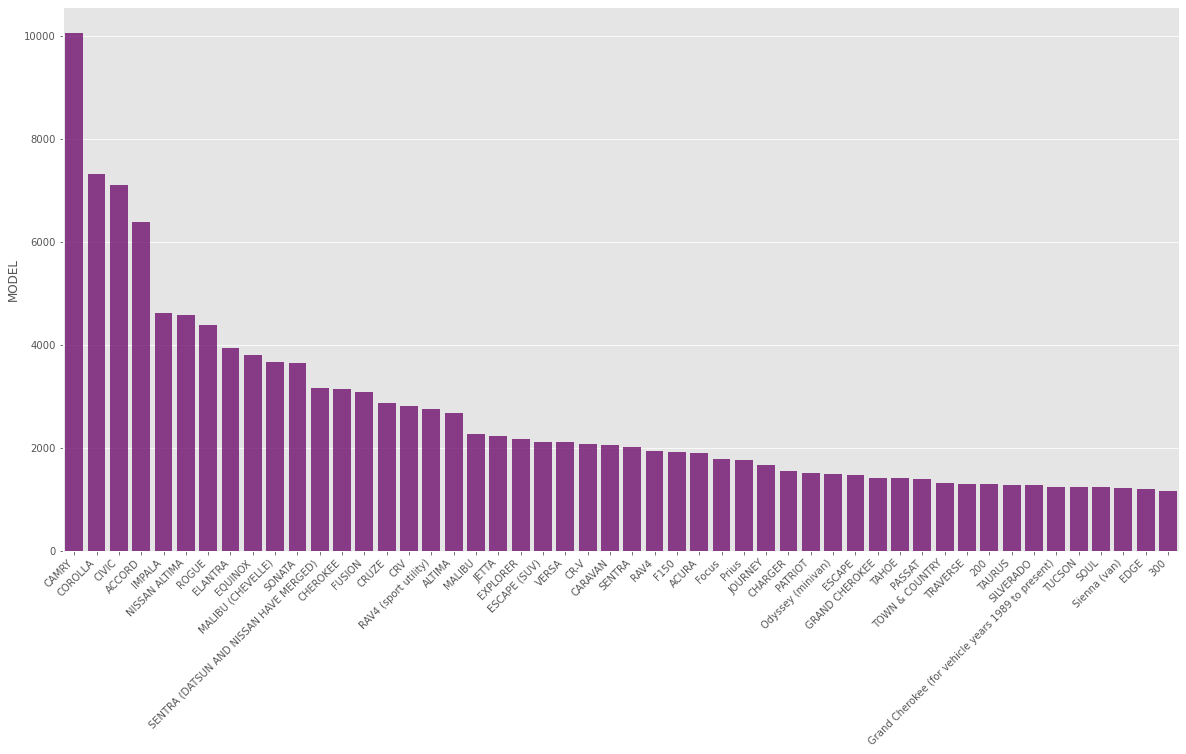

In [50]:
fig, ax = plt.subplots(figsize=[20,10])
sns.barplot(x=df['MODEL'].value_counts().index[:50], y=df['MODEL'].value_counts()[:50], color='purple',alpha=0.8)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show();

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228365 entries, 0 to 339807
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            228365 non-null  object  
 1   DEVICE_CONDITION      228365 non-null  object  
 2   POSTED_SPEED_LIMIT    228365 non-null  int64   
 3   WEATHER_CONDITION     228365 non-null  object  
 4   LIGHTING_CONDITION    228365 non-null  object  
 5   ROADWAY_SURFACE_COND  228365 non-null  object  
 6   ROAD_DEFECT           228365 non-null  object  
 7   DAMAGE                228365 non-null  category
 8   ZIPCODE               228365 non-null  object  
 9   SEX                   228365 non-null  category
 10  AGE                   228365 non-null  int64   
 11  MAKE                  228365 non-null  object  
 12  MODEL                 228365 non-null  object  
 13  VEHICLE_YEAR          228365 non-null  int64   
dtypes: category(2), int64(3), object(9)


#### 8. VEHICLE_YEAR
Looks like there are some entry errors. Select the 'VEHICLE_YEAR' range from 1900 to 2022.

In [52]:
df['VEHICLE_YEAR'].value_counts()

2015    17553
2016    16182
2014    15402
2013    14976
2017    14947
        ...  
3013        1
2402        1
1900        1
2031        1
2049        1
Name: VEHICLE_YEAR, Length: 105, dtype: int64

In [53]:
df = df[(df.VEHICLE_YEAR >= 1995) & (df.VEHICLE_YEAR <= 2022)]

In [54]:
len(df['VEHICLE_YEAR'].value_counts())

28

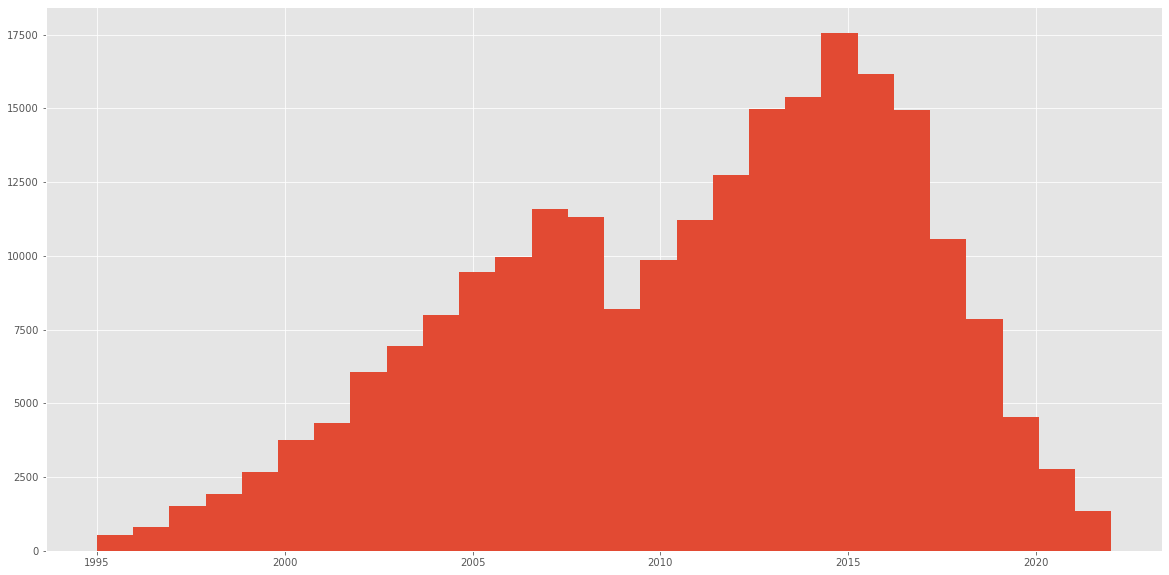

In [55]:
fig, ax = plt.subplots(figsize=[20,10])
df['VEHICLE_YEAR'].hist(bins=28)
plt.show();

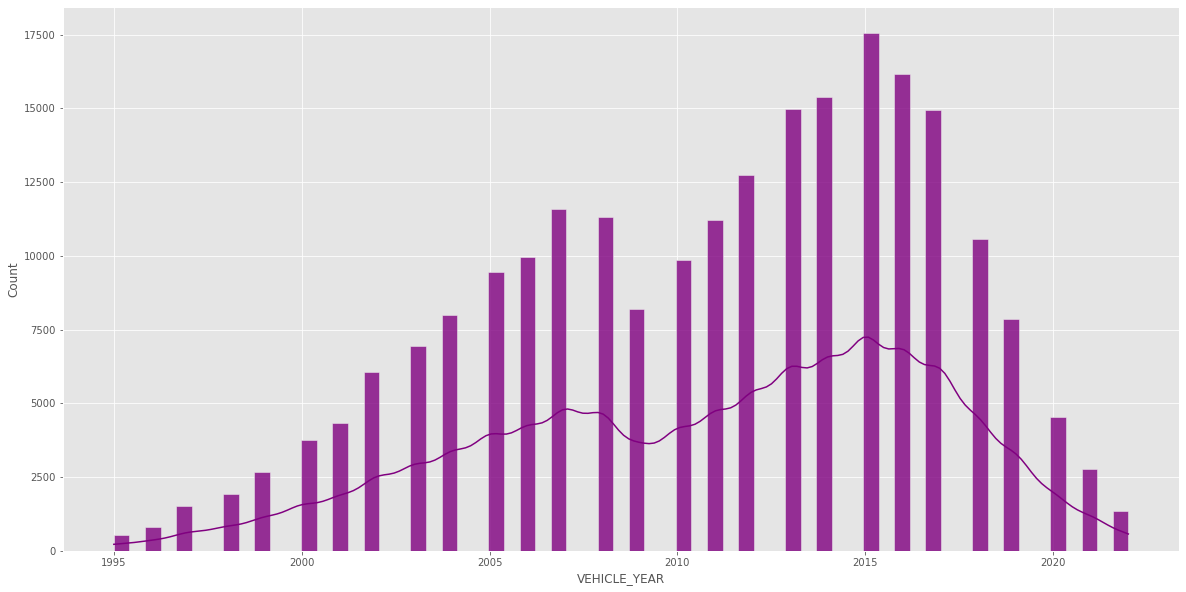

In [56]:
fig, ax = plt.subplots(figsize=[20,10])
sns.histplot(df['VEHICLE_YEAR'], color='purple',alpha=0.8, bins=65, kde=True)
plt.show();

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227016 entries, 0 to 339807
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   CRASH_DATE            227016 non-null  object  
 1   DEVICE_CONDITION      227016 non-null  object  
 2   POSTED_SPEED_LIMIT    227016 non-null  int64   
 3   WEATHER_CONDITION     227016 non-null  object  
 4   LIGHTING_CONDITION    227016 non-null  object  
 5   ROADWAY_SURFACE_COND  227016 non-null  object  
 6   ROAD_DEFECT           227016 non-null  object  
 7   DAMAGE                227016 non-null  category
 8   ZIPCODE               227016 non-null  object  
 9   SEX                   227016 non-null  category
 10  AGE                   227016 non-null  int64   
 11  MAKE                  227016 non-null  object  
 12  MODEL                 227016 non-null  object  
 13  VEHICLE_YEAR          227016 non-null  int64   
dtypes: category(2), int64(3), object(9)


## DONE! Save the cleaned DataFrame

In [58]:
df.to_csv('df_clean.csv')

# More Visualization

In [59]:
df_test = df.groupby(["SEX","DAMAGE"])['DAMAGE'].count()
df_test

SEX  DAMAGE       
F    $500 OR LESS      8259
     $501 - $1,500    28332
     OVER $1,500      62894
M    $500 OR LESS     10248
     $501 - $1,500    34678
     OVER $1,500      82605
Name: DAMAGE, dtype: int64

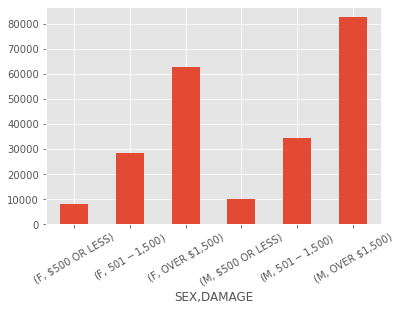

In [60]:
# # plot the result
df_test.plot(kind="bar")
plt.xticks(rotation=30)
plt.show();